<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [14]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [15]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [16]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

#For the "Median value of owner-occupied homes" provide a boxplot

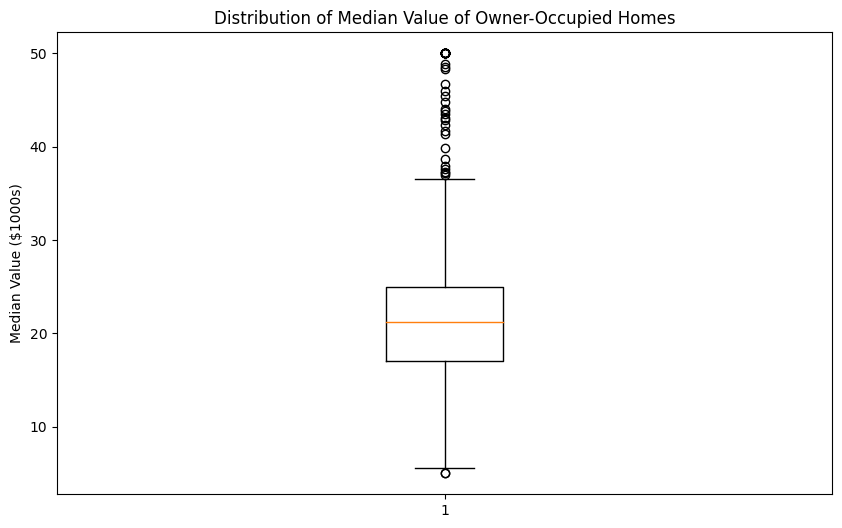

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()


Provide a  bar plot for the Charles river variable

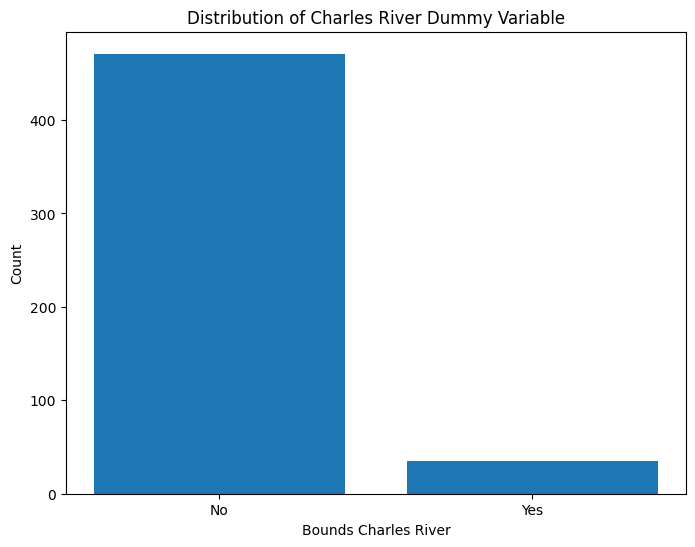

In [18]:
# Count the occurrences of each category
chas_counts = boston_df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chas_counts.index, chas_counts.values)
plt.title('Distribution of Charles River Dummy Variable')
plt.xlabel('Bounds Charles River')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



<Figure size 1200x600 with 0 Axes>

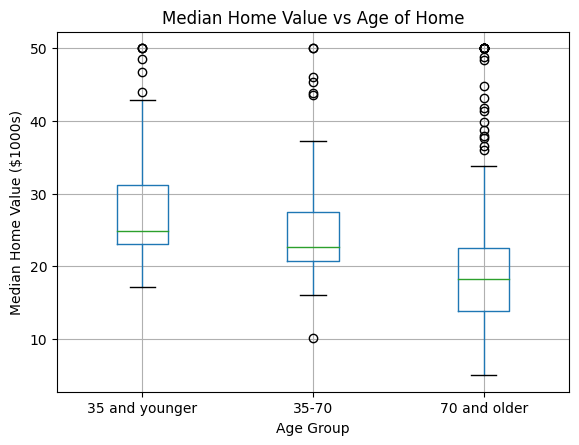

In [19]:
# Discretize the AGE variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], 
                           bins=[0, 35, 70, 100], 
                           labels=['35 and younger', '35-70', '70 and older'])

# Create the boxplot
plt.figure(figsize=(12, 6))
boston_df.boxplot(column='MEDV', by='AGE_Group')

plt.title('Median Home Value vs Age of Home')
plt.suptitle('')  # This removes the automatic suptitle
plt.xlabel('Age Group')
plt.ylabel('Median Home Value ($1000s)')

plt.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

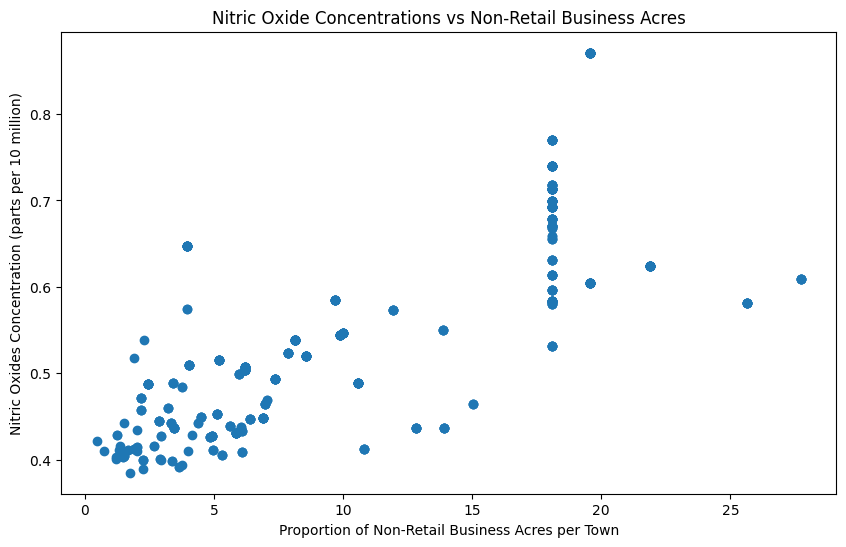

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million)')
plt.show()

The scatter plot reveals a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town. As industrial land use increases, air pollution levels tend to rise. The relationship appears non-linear, with a steeper increase at lower proportions of business acres before leveling off. There's significant clustering at lower values and some outliers at high nitric oxide levels. This suggests that industrial activity contributes to air pollution, but other factors likely play a role given the variability in the data.

Create a histogram for the pupil to teacher ratio variable

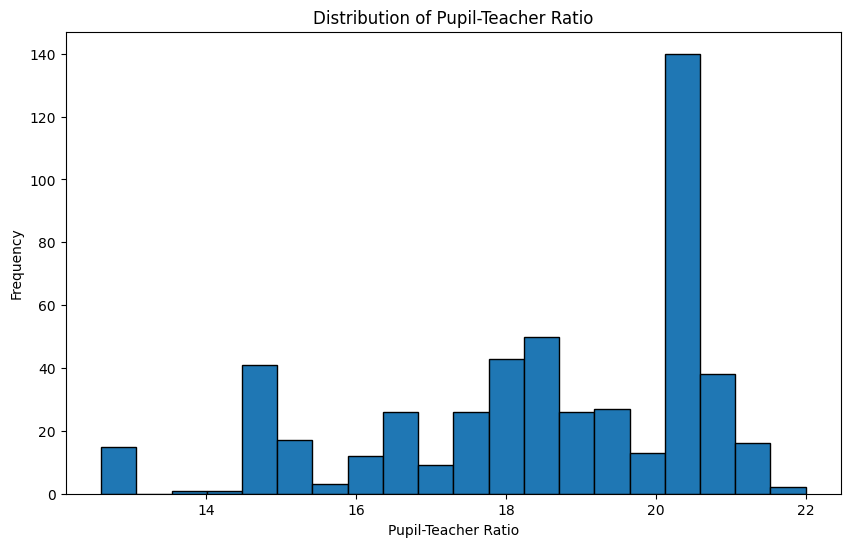

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river and those that are not.

In [25]:
# Separate the data into two groups
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(river, no_river)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


The P-value is lesser than 0.05. So, we reject the null hypothesis. This means there is a significant difference in the median value of houses bounded by the Charles river and those that are not.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Null Hypothesis (H0): There is no significant difference in the median values of houses (MEDV) among different age groups of houses.
Alternative Hypothesis (H1): There is a significant difference in the median values of houses (MEDV) among different age groups of houses.


In [26]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['Young', 'Middle', 'Old'])

# Perform one-way ANOVA
young = boston_df[boston_df['AGE_Group'] == 'Young']['MEDV']
middle = boston_df[boston_df['AGE_Group'] == 'Middle']['MEDV']
old = boston_df[boston_df['AGE_Group'] == 'Old']['MEDV']

f_statistic, p_value = stats.f_oneway(young, middle, old)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


There is strong statistical evidence to conclude that there is a significant difference in the median values of houses (MEDV) among different age groups of houses (proportions of owner-occupied units built prior to 1940). Hence, we reject the null hypothesis.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis (H0): There is no correlation between NOX and INDUS (ρ = 0)
Alternative Hypothesis (H1): There is a correlation between NOX and INDUS (ρ ≠ 0)

In [27]:
# Extract the relevant columns
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Perform Pearson correlation test
r, p_value = stats.pearsonr(nox, indus)

# Print results
print(f"Pearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient (r): 0.7637
P-value: 0.0000


we reject the null hypothesis.
We can conclude that there is strong evidence of a statistically significant correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
The Pearson correlation coefficient (r) of 0.7637 indicates a strong positive correlation between these variables. This means that as the proportion of non-retail business acres per town increases, the nitric oxide concentrations tend to increase as well, and vice versa.

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis (H0): There is no significant linear relationship between DIS and MEDV (β1 = 0)
Alternative Hypothesis (H1): There is a significant linear relationship between DIS and MEDV (β1 ≠ 0)

In [28]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract key statistics
coefficient = model.params['DIS']
p_value = model.pvalues['DIS']
r_squared = model.rsquared

print(f"Coefficient (impact of DIS on MEDV): {coefficient:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        11:49:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

we reject the null hypothesis.
We can conclude that there is a statistically significant linear relationship between the weighted distance to Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).
The coefficient (1.0916) indicates that for each unit increase in weighted distance to employment centers, the median value of owner-occupied homes increases by approximately $1,092. This suggests a positive relationship between distance and home value.
However, the R-squared value of 0.0625 indicates that only about 6.25% of the variance in median home values is explained by the weighted distance to employment centers. This suggests that while there is a significant relationship, other factors not included in this simple regression model likely play a larger role in determining home values.